# Experiment 04

This Experiment is the main experiment of the work, consists in run an optimized Random Forest in order to try to predict the values in question.(https://www.researchgate.net/publication/221533996_From_an_artificial_neural_network_to_a_stock_market_day-trading_system_A_case_study_on_the_BMF_BOVESPA).

In [1]:
import numpy as np
import pandas as pd

import Utils 
from Utils import calculateEMA, calculateBB, addPreviousDays, removeColumns, getPeriod, mape, mae, createDate, getDate, printResult

import matplotlib.pyplot as plt
import matplotlib.dates as mpdates
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

### Constants and Parameters

In [2]:
dfColumns = ['date','open', 'high', 'low','close','tickvol','volume','spread']
newColumns = ['open', 'high', 'low', 'close']
col15 = ['open','d-5_high','d-5_low','d-4_high','d-4_low','d-3_high','d-3_low','d-2_high','d-2_low','d-1_high','d-1_low','EMA_high','EMA_low','UB_close','LB_close']
col25 = ['open','d-5_open','d-5_high','d-5_low','d-5_close','d-4_open','d-4_high','d-4_low','d-4_close','d-3_open','d-3_high','d-3_low','d-3_close','d-2_open','d-2_high','d-2_low','d-2_close','d-1_open','d-1_high','d-1_low','d-1_close','EMA_high' ,'EMA_low','UB_close','LB_close']
DAYS = 5
TEST_BEGIN = '2021.04.06'
TEST_END = '2021.06.01'
TRAIN_BEGIN = '2020.03.31'
TRAIN_END = '2021.05.31'
TIMES = 10

### Opening the dataset

In [3]:
df = pd.read_csv('../Data/PETR4_Daily.csv', sep = "\t")
df.columns = dfColumns
df = removeColumns(df, ['tickvol', 'volume','spread'])

df2 = pd.read_csv('../Data/VALE3_Daily.csv', sep = "\t")

df2.columns = dfColumns
df2 = removeColumns(df2, ['tickvol', 'volume','spread'])

df 
df.tail(290)

,date,open,high,low,close
1049,2020.03.31,13.16,14.07,13.16,13.54
1050,2020.04.01,13.01,14.08,12.89,13.84
1051,2020.04.02,14.90,16.01,14.52,15.01
1052,2020.04.03,15.77,15.83,14.44,14.84
1053,2020.04.06,15.53,15.58,14.69,15.26
...,...,...,...,...,...
1334,2021.05.26,25.91,26.18,25.65,26.09
1335,2021.05.27,26.08,26.25,25.77,25.91
1336,2021.05.28,26.20,27.02,26.15,26.99
1337,2021.05.31,26.96,27.20,26.78,26.87


In [4]:
#PETR4
df = calculateEMA(df,DAYS,newColumns)
df = calculateBB(df,DAYS,newColumns)
df = addPreviousDays(df,DAYS, newColumns)

#VALE3
df2 = calculateEMA(df2,DAYS,newColumns)
df2 = calculateBB(df2,DAYS,newColumns)
df2 = addPreviousDays(df2,DAYS, newColumns)

In [5]:
##df = getPeriod(df, '2020.03.02','2021.04.30', True)
##initialDf = getPeriod(df, '2020.03.02','2021.04.30', True)

In [6]:
initialDf_PETR4 = getPeriod(df, '2019.01.02','2021.06.01', True)
initialDf_VALE3 = getPeriod(df2, '2020.01.02','2021.06.01', True)

In [7]:
initialDf_PETR4

,date,open,high,low,close,EMA_open,EMA_high,EMA_low,EMA_close,UB_open,...,d-3_low,d-3_close,d-4_open,d-4_high,d-4_low,d-4_close,d-5_open,d-5_high,d-5_low,d-5_close
0,2019.01.02,21.18,22.73,20.93,22.60,20.609175,21.499077,20.380957,21.271656,21.776315,...,19.18,20.37,19.55,20.08,19.41,19.69,20.38,20.39,19.50,19.63
1,2019.01.03,22.51,23.32,22.36,23.16,21.242783,22.106051,21.040638,21.901104,23.157151,...,19.99,20.36,19.34,20.37,19.18,20.37,19.55,20.08,19.41,19.69
2,2019.01.04,23.35,23.43,22.99,23.22,21.945189,22.547367,21.690425,22.340736,24.186721,...,20.74,21.31,20.22,20.65,19.99,20.36,19.34,20.37,19.18,20.37
3,2019.01.07,23.35,24.35,23.20,23.59,22.413459,23.148245,22.193617,22.757157,24.644733,...,20.93,22.60,20.77,21.45,20.74,21.31,20.22,20.65,19.99,20.36
4,2019.01.08,23.86,23.88,23.27,23.45,22.895640,23.392163,22.552411,22.988105,24.953473,...,22.36,23.16,21.18,22.73,20.93,22.60,20.77,21.45,20.74,21.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2021.05.26,25.91,26.18,25.65,26.09,26.114791,26.354219,25.760657,26.042263,26.608719,...,25.94,25.95,26.15,26.28,25.72,25.93,25.85,26.35,25.80,26.15
595,2021.05.27,26.08,26.25,25.77,25.91,26.103194,26.319479,25.763771,25.998175,26.604087,...,25.99,26.39,26.08,26.31,25.94,25.95,26.15,26.28,25.72,25.93
596,2021.05.28,26.20,27.02,26.15,26.99,26.135462,26.552986,25.892514,26.328784,26.617551,...,25.78,25.84,26.28,26.52,25.99,26.39,26.08,26.31,25.94,25.95
597,2021.05.31,26.96,27.20,26.78,26.87,26.410308,26.768657,26.188343,26.509189,27.147657,...,25.65,26.09,26.48,26.62,25.78,25.84,26.28,26.52,25.99,26.39


In [8]:
initialDf_VALE3

,date,open,high,low,close,EMA_open,EMA_high,EMA_low,EMA_close,UB_open,...,d-3_low,d-3_close,d-4_open,d-4_high,d-4_low,d-4_close,d-5_open,d-5_high,d-5_low,d-5_close
0,2020.01.02,50.52,50.95,50.31,50.85,50.225554,50.487454,49.864452,50.203124,50.685390,...,49.90,50.16,50.26,50.33,49.80,49.96,50.14,50.34,49.57,50.16
1,2020.01.03,50.24,51.01,50.15,50.47,50.230370,50.661636,49.959634,50.292083,50.686307,...,50.00,50.16,50.17,50.35,49.90,50.16,50.26,50.33,49.80,49.96
2,2020.01.06,50.35,50.35,49.74,50.17,50.270246,50.557757,49.886423,50.251388,50.671662,...,49.79,49.88,50.53,50.54,50.00,50.16,50.17,50.35,49.90,50.16
3,2020.01.07,50.07,50.72,49.98,50.54,50.203498,50.611838,49.917615,50.347592,50.614274,...,50.31,50.85,50.21,50.41,49.79,49.88,50.53,50.54,50.00,50.16
4,2020.01.08,50.73,50.89,50.18,50.55,50.378998,50.704559,50.005077,50.415062,50.890606,...,50.15,50.47,50.52,50.95,50.31,50.85,50.21,50.41,49.79,49.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,2021.05.26,106.37,110.32,106.03,110.20,109.166674,111.131617,107.622606,109.807900,113.973861,...,108.50,109.40,111.70,112.10,110.20,111.11,112.10,112.78,109.84,112.25
347,2021.05.27,110.80,112.09,109.77,110.99,109.711116,111.451078,108.338404,110.201933,113.405981,...,107.51,109.78,111.11,111.25,108.50,109.40,111.70,112.10,110.20,111.11
348,2021.05.28,111.11,112.75,109.42,111.59,110.177411,111.884052,108.698936,110.664622,113.405981,...,106.78,107.05,108.00,110.14,107.51,109.78,111.11,111.25,108.50,109.40
349,2021.05.31,112.50,114.89,112.50,114.78,110.951607,112.886035,109.965957,112.036415,114.811204,...,106.03,110.20,110.28,110.89,106.78,107.05,108.00,110.14,107.51,109.78


#### Experimento 04: Utilizando Random Forest

In [9]:
def exp04(df, stock, inputColumns = []):
    #df = getPeriod(df, '2020.03.02','2021.04.30', True)
    #print(df)
    
    df_train = getPeriod(df, TRAIN_BEGIN, TRAIN_END)
    df_test = getPeriod(df, TEST_BEGIN, TEST_END)
    
    if(inputColumns == []):
        x_train = df_train.drop(['date', 'high', 'low', 'close'], axis=1)
        y_train = df_train[['high','low']]

        x_test = df_test.drop(['date', 'high', 'low', 'close'], axis=1)
        y_test = df_test[['high','low']]
    else:
        x_train = df_train[inputColumns]
        y_train = df_train[['high','low']]

        x_test = df_test[inputColumns]
        y_test = df_test[['high','low']]

    rf = RandomForestRegressor(n_estimators = 500)
    rf.fit(x_train, y_train);
    y_pred = rf.predict(x_test)
    
    errorMax = mape(y_test['high'],y_pred[:,0])
    errorMin = mape(y_test['low'],y_pred[:,1])
    
    #print (mape(y_test['high'],y_pred[:,0]))
    #print (mape(y_test['low'],y_pred[:,1]))
    #print (mae(y_test['high'],y_pred[:,0]))
    #print (mae(y_test['low'],y_pred[:,1]))
    
    return errorMax, errorMin

def test30timesExp04(df,stock, phrase, columnInput = []):
    errorMax = []
    errorMin = []
    
    for i in range(1, TIMES+1):
        if(columnInput == []):
            errorMax_petr4, errorMin_petr4 = exp04(df, stock)
        else: 
            errorMax_petr4, errorMin_petr4 = exp04(df, stock, columnInput)
            
        errorMax.append(errorMax_petr4[0])
        errorMin.append(errorMin_petr4[0])
    
    errorMax = np.array(errorMax)
    errorMin = np.array(errorMin)
    print(phrase)
    printResult((errorMax.mean(),errorMax.std()), 'High')
    printResult((errorMin.mean(),errorMin.std()), 'Low')
    
test30timesExp04(initialDf_PETR4, 'PETR4', 'PETR4 15 Variables', col15) 
test30timesExp04(initialDf_PETR4, 'PETR4', 'PETR4 25 Variables', col25) 
test30timesExp04(initialDf_PETR4, 'PETR4', 'PETR4 33 Variables') 
print('\n')
test30timesExp04(initialDf_VALE3, 'VALE3', 'VALE3 15 Variables', col15) 
test30timesExp04(initialDf_VALE3, 'VALE3', 'VALE3 25 Variables', col25) 
test30timesExp04(initialDf_VALE3, 'VALE3', 'VALE3 33 Variables')     

PETR4 15 Variables
High: 0.34 +- 0.01 %
Low: 0.25 +- 0.01 %
PETR4 25 Variables
High: 0.35 +- 0.01 %
Low: 0.26 +- 0.01 %
PETR4 33 Variables
High: 0.33 +- 0.01 %
Low: 0.25 +- 0.01 %


VALE3 15 Variables
High: 0.37 +- 0.01 %
Low: 0.31 +- 0.01 %
VALE3 25 Variables
High: 0.39 +- 0.01 %
Low: 0.32 +- 0.01 %
VALE3 33 Variables
High: 0.38 +- 0.01 %
Low: 0.32 +- 0.01 %


In [10]:
df4 = getPeriod(initialDf_PETR4, '2020.03.02','2021.04.30', True)

df_train = getPeriod(df4, '2020.03.02','2021.03.31')
df_test = getPeriod(df4, '2021.04.01','2021.04.30')

x_train = df_train.drop(['date', 'high', 'low', 'close'], axis=1)
y_train = df_train[['high','low']]

x_test = df_test.drop(['date', 'high', 'low', 'close'], axis=1)
y_test = df_test[['high','low']]

rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(x_train, y_train);
y_pred = rf.predict(x_test)

print (mape(y_test['high'],y_pred[:,0]))
print (mape(y_test['low'],y_pred[:,1]))
print (mae(y_test['high'],y_pred[:,0]))
print (mae(y_test['low'],y_pred[:,1]))

(1.300031457648528, 1.19800469876803)
(0.8744770681792724, 0.6467605115390175)
(0.3122909999999262, 0.29716961294689304)
(0.20347950000010293, 0.15169948722642762)


Feature: 0, Score: 0.89479
Feature: 1, Score: 0.00034
Feature: 2, Score: 0.00267
Feature: 3, Score: 0.01254
Feature: 4, Score: 0.00806
Feature: 5, Score: 0.00029
Feature: 6, Score: 0.01062
Feature: 7, Score: 0.00078
Feature: 8, Score: 0.00776
Feature: 9, Score: 0.00056
Feature: 10, Score: 0.00316
Feature: 11, Score: 0.00191
Feature: 12, Score: 0.00634
Feature: 13, Score: 0.00182
Feature: 14, Score: 0.00825
Feature: 15, Score: 0.01513
Feature: 16, Score: 0.01900
Feature: 17, Score: 0.00053
Feature: 18, Score: 0.00028
Feature: 19, Score: 0.00244
Feature: 20, Score: 0.00068
Feature: 21, Score: 0.00011
Feature: 22, Score: 0.00016
Feature: 23, Score: 0.00015
Feature: 24, Score: 0.00021
Feature: 25, Score: 0.00015
Feature: 26, Score: 0.00018
Feature: 27, Score: 0.00018
Feature: 28, Score: 0.00016
Feature: 29, Score: 0.00023
Feature: 30, Score: 0.00016
Feature: 31, Score: 0.00015
Feature: 32, Score: 0.00019


<BarContainer object of 33 artists>

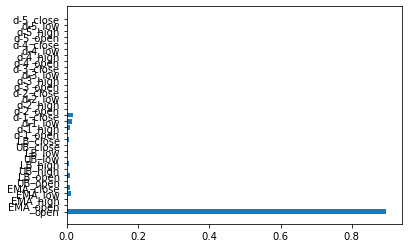

In [11]:
importance = rf.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

importance

from matplotlib import pyplot as plt
plt.barh(x_train.columns, rf.feature_importances_)

In [12]:
def exp041(df, stock, inputColumns = []):
    #df = getPeriod(df, '2020.03.02','2021.04.30', True)
    
    #print(df)
    df_train = getPeriod(df, TRAIN_BEGIN, TRAIN_END)
    df_test = getPeriod(df, TEST_BEGIN, TEST_END)
    
    if(inputColumns == []):
        x_train = df_train.drop(['date', 'high', 'low', 'close'], axis=1)
        y_train = df_train[['high','low']]

        x_test = df_test.drop(['date', 'high', 'low', 'close'], axis=1)
        y_test = df_test[['high','low']]
    else:
        x_train = df_train[inputColumns]
        y_train = df_train[['high','low']]

        x_test = df_test[inputColumns]
        y_test = df_test[['high','low']]

    for i in range(1, 5):    
        rf = RandomForestRegressor(n_estimators = 1)
        rf.fit(x_train, y_train);
        y_pred = rf.predict(x_test)
        
        print(i)
        errorMax = mape(y_test['high'],y_pred[:,0])
        errorMin = mape(y_test['low'],y_pred[:,1])
        printResult(errorMax, 'High')
        printResult(errorMin, 'Low')
    
    importance = rf.feature_importances_
    
    featureImp = []
    for feat, importance in zip(x_train.columns, rf.feature_importances_):  
        temp = [feat, importance*100]
        featureImp.append(temp)

    fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])
    print (fT_df.sort_values('Importance', ascending = False))
    
    #print (mape(y_test['high'],y_pred[:,0]))
    #print (mape(y_test['low'],y_pred[:,1]))
    #print (mae(y_test['high'],y_pred[:,0]))
    #print (mae(y_test['low'],y_pred[:,1]))
    
    return errorMax, errorMin, y_pred, y_test

a,b,c,d = exp041(initialDf_VALE3, 'PETR4')

1
High: 0.52 +- 0.84 %
Low: 0.54 +- 0.99 %
2
High: 0.4 +- 0.77 %
Low: 0.32 +- 0.65 %
3
High: 0.4 +- 0.73 %
Low: 0.41 +- 0.71 %
4
High: 0.26 +- 0.6 %
Low: 0.26 +- 0.7 %
      Feature  Importance
7     UB_high   84.226094
0        open    7.165996
11   UB_close    5.563988
2    EMA_high    1.636609
4   EMA_close    0.992806
23    d-3_low    0.110964
9      UB_low    0.093779
16  d-1_close    0.060783
27    d-4_low    0.032149
6     LB_open    0.029152
10     LB_low    0.022395
21   d-3_open    0.016310
19    d-2_low    0.008523
29   d-5_open    0.008347
24  d-3_close    0.006205
13   d-1_open    0.005667
12   LB_close    0.004649
3     EMA_low    0.002629
31    d-5_low    0.001872
22   d-3_high    0.001863
26   d-4_high    0.001825
15    d-1_low    0.001768
14   d-1_high    0.001610
25   d-4_open    0.001391
20  d-2_close    0.000709
30   d-5_high    0.000624
8     LB_high    0.000348
17   d-2_open    0.000289
5     UB_open    0.000271
32  d-5_close    0.000139
28  d-4_close    0.000133


In [13]:
printResult(a, 'High')
printResult(b, 'Low')

High: 0.26 +- 0.6 %
Low: 0.26 +- 0.7 %


In [14]:
d

,high,low
311,104.56,102.05
312,105.32,102.15
313,105.30,104.12
314,104.66,102.94
315,103.63,102.21
316,104.29,102.85
317,107.78,103.77
318,109.88,107.55
319,109.11,107.50
320,109.88,107.64


In [15]:
initialDf_PETR4

,date,open,high,low,close,EMA_open,EMA_high,EMA_low,EMA_close,UB_open,...,d-3_low,d-3_close,d-4_open,d-4_high,d-4_low,d-4_close,d-5_open,d-5_high,d-5_low,d-5_close
0,2019.01.02,21.18,22.73,20.93,22.60,20.609175,21.499077,20.380957,21.271656,21.776315,...,19.18,20.37,19.55,20.08,19.41,19.69,20.38,20.39,19.50,19.63
1,2019.01.03,22.51,23.32,22.36,23.16,21.242783,22.106051,21.040638,21.901104,23.157151,...,19.99,20.36,19.34,20.37,19.18,20.37,19.55,20.08,19.41,19.69
2,2019.01.04,23.35,23.43,22.99,23.22,21.945189,22.547367,21.690425,22.340736,24.186721,...,20.74,21.31,20.22,20.65,19.99,20.36,19.34,20.37,19.18,20.37
3,2019.01.07,23.35,24.35,23.20,23.59,22.413459,23.148245,22.193617,22.757157,24.644733,...,20.93,22.60,20.77,21.45,20.74,21.31,20.22,20.65,19.99,20.36
4,2019.01.08,23.86,23.88,23.27,23.45,22.895640,23.392163,22.552411,22.988105,24.953473,...,22.36,23.16,21.18,22.73,20.93,22.60,20.77,21.45,20.74,21.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2021.05.26,25.91,26.18,25.65,26.09,26.114791,26.354219,25.760657,26.042263,26.608719,...,25.94,25.95,26.15,26.28,25.72,25.93,25.85,26.35,25.80,26.15
595,2021.05.27,26.08,26.25,25.77,25.91,26.103194,26.319479,25.763771,25.998175,26.604087,...,25.99,26.39,26.08,26.31,25.94,25.95,26.15,26.28,25.72,25.93
596,2021.05.28,26.20,27.02,26.15,26.99,26.135462,26.552986,25.892514,26.328784,26.617551,...,25.78,25.84,26.28,26.52,25.99,26.39,26.08,26.31,25.94,25.95
597,2021.05.31,26.96,27.20,26.78,26.87,26.410308,26.768657,26.188343,26.509189,27.147657,...,25.65,26.09,26.48,26.62,25.78,25.84,26.28,26.52,25.99,26.39
